# Studi Kasus Bab 5

## Data Preprocessing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
boston=pd.read_csv('../input/the-boston-houseprice-data/boston.csv')
customer_train=pd.read_csv('../input/customer-segmentation/Train.csv')
customer_test=pd.read_csv('../input/customer-segmentation/Test.csv')

In [3]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
customer_train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [7]:
customer_test.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64

In [8]:
customer_train.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [9]:
customer_train.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [10]:
customer_test.describe()

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [11]:
categorical_col=customer_train.select_dtypes('object')

for i in categorical_col:
    print(customer_train[i].value_counts(), end="\n\n")

Male      4417
Female    3651
Name: Gender, dtype: int64

Yes    4643
No     3285
Name: Ever_Married, dtype: int64

Yes    4968
No     3022
Name: Graduated, dtype: int64

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64



In [12]:
categorical_col=customer_test.select_dtypes('object')

for i in categorical_col:
    print(customer_test[i].value_counts(), end="\n\n")

Male      1424
Female    1203
Name: Gender, dtype: int64

Yes    1520
No     1057
Name: Ever_Married, dtype: int64

Yes    1602
No     1001
Name: Graduated, dtype: int64

Artist           802
Healthcare       418
Entertainment    301
Doctor           242
Engineer         236
Lawyer           221
Executive        176
Marketing        111
Homemaker         82
Name: Profession, dtype: int64

Low        1616
Average     625
High        386
Name: Spending_Score, dtype: int64

Cat_6    1672
Cat_4     386
Cat_3     267
Cat_2     141
Cat_7      66
Cat_1      34
Cat_5      29
Name: Var_1, dtype: int64

A    846
D    759
B    550
C    472
Name: Segmentation, dtype: int64



In [13]:
customer_test.duplicated().sum()

0

In [14]:
customer_train.duplicated().sum()

0

In [15]:
customer_train['Work_Experience']=customer_train['Work_Experience'].fillna(customer_train['Work_Experience'].median())
customer_train['Family_Size']=customer_train['Family_Size'].fillna(customer_train['Family_Size'].median())
customer_train['Ever_Married']=customer_train['Ever_Married'].fillna('Yes')
customer_train['Graduated']=customer_train['Graduated'].fillna('Yes')
customer_train['Profession']=customer_train['Profession'].fillna('Artist')
customer_train['Var_1']=customer_train['Var_1'].fillna('Cat_6')

In [16]:
customer_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A


In [17]:
customer_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   object 
 5   Profession       8068 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      8068 non-null   float64
 9   Var_1            8068 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [18]:
customer_test['Work_Experience']=customer_test['Work_Experience'].fillna(customer_test['Work_Experience'].median())
customer_test['Family_Size']=customer_test['Family_Size'].fillna(customer_test['Family_Size'].median())
customer_test['Ever_Married']=customer_test['Ever_Married'].fillna('Yes')
customer_test['Graduated']=customer_test['Graduated'].fillna('Yes')
customer_test['Profession']=customer_test['Profession'].fillna('Artist')
customer_test['Var_1']=customer_test['Var_1'].fillna('Cat_6')

In [19]:
customer_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2627 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2627 non-null   object 
 5   Profession       2627 non-null   object 
 6   Work_Experience  2627 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2627 non-null   float64
 9   Var_1            2627 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB


In [20]:
customer_train=customer_train.drop('ID',axis=1)
customer_test=customer_test.drop('ID',axis=1)

## Analisis Data Eksploratif

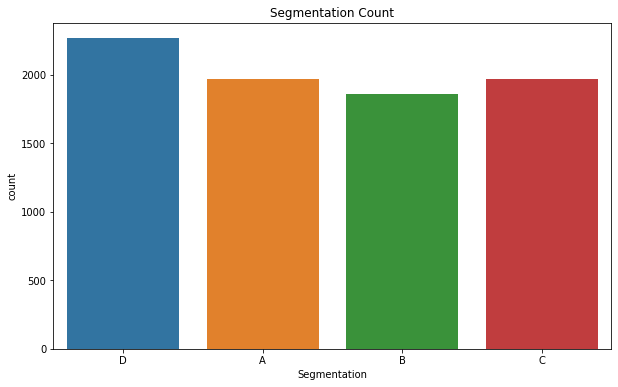

In [21]:
plt.figure(figsize=(10,6))
plt.title('Segmentation Count')
sns.countplot(x=customer_train.Segmentation)
plt.show()

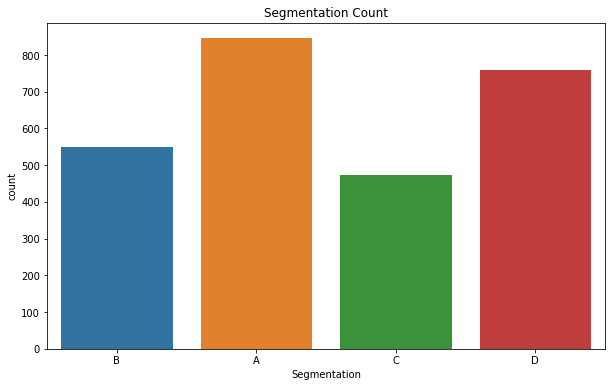

In [22]:
plt.figure(figsize=(10,6))
plt.title('Segmentation Count')
sns.countplot(x=customer_test.Segmentation)
plt.show()

<Figure size 720x432 with 0 Axes>

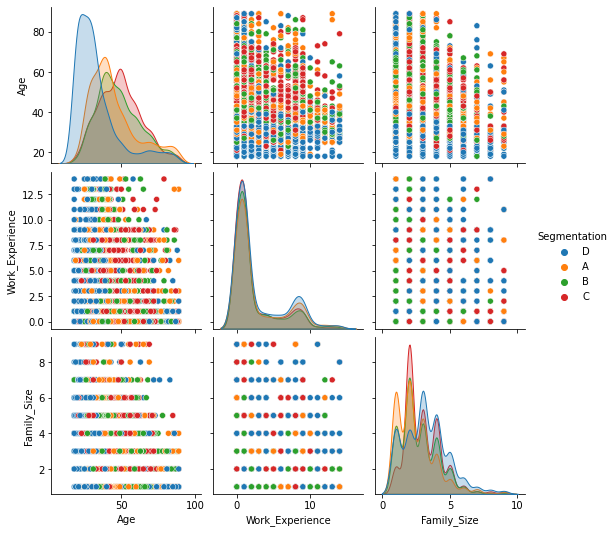

In [23]:
plt.figure(figsize=(10,6))
sns.pairplot(customer_train,hue='Segmentation')

<Figure size 720x432 with 0 Axes>

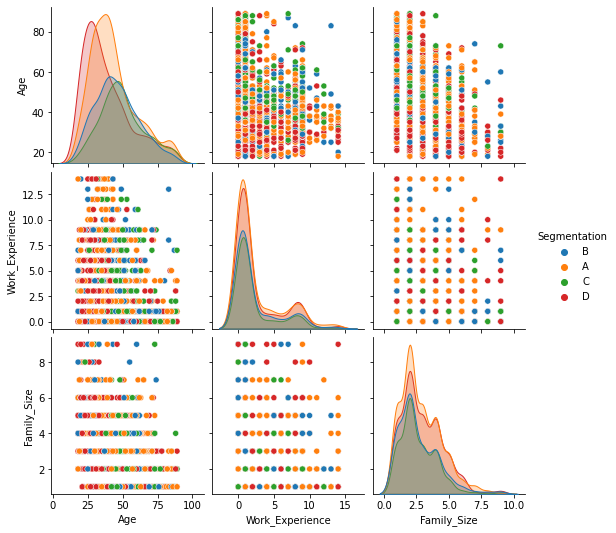

In [24]:
plt.figure(figsize=(10,6))
sns.pairplot(customer_test,hue='Segmentation')

In [25]:
genders={'Male':0,'Female':1}
customer_train['Gender']=customer_train['Gender'].map(genders)
customer_test['Gender']=customer_test['Gender'].map(genders)

married={'No':0,'Yes':1}
customer_train['Ever_Married']=customer_train['Ever_Married'].map(married)
customer_test['Ever_Married']=customer_test['Ever_Married'].map(married)

graduate={'No':0,'Yes':1}
customer_train['Graduated']=customer_train['Graduated'].map(graduate)
customer_test['Graduated']=customer_test['Graduated'].map(graduate)

spending_score={'Low':0,'Average':1,'High':2}
customer_train['Spending_Score']=customer_train['Spending_Score'].map(spending_score)
customer_test['Spending_Score']=customer_test['Spending_Score'].map(spending_score)

var_score={'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,'Cat_7':7}
customer_train['Var_1']=customer_train['Var_1'].map(var_score)
customer_test['Var_1']=customer_test['Var_1'].map(var_score)

rank={'A':0,'B':1,'C':2,'D':3}
customer_train['Segmentation']=customer_train['Segmentation'].map(rank)
customer_test['Segmentation']=customer_test['Segmentation'].map(rank)

In [26]:
cust_dummy_train=pd.get_dummies(customer_train)
cust_dummy_test=pd.get_dummies(customer_test)

In [27]:
cust_dummy_train.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,0,0,22,0,1.0,0,4.0,4,3,0,0,0,0,0,1,0,0,0
1,1,1,38,1,1.0,1,3.0,4,0,0,0,1,0,0,0,0,0,0
2,1,1,67,1,1.0,0,1.0,6,1,0,0,1,0,0,0,0,0,0
3,0,1,67,1,0.0,2,2.0,6,1,0,0,0,0,0,0,0,1,0
4,1,1,40,1,1.0,2,6.0,6,0,0,0,0,1,0,0,0,0,0


In [28]:
cust_dummy_test.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,1,1,36,1,0.0,0,1.0,6,1,0,0,1,0,0,0,0,0,0
1,0,1,37,1,8.0,1,4.0,6,0,0,0,0,0,0,1,0,0,0
2,1,1,69,0,0.0,0,1.0,6,0,1,0,0,0,0,0,0,0,0
3,0,1,59,0,11.0,2,2.0,6,1,0,0,0,0,1,0,0,0,0
4,1,0,19,0,1.0,0,4.0,6,0,0,0,0,0,0,0,0,0,1


In [29]:
cust_dummy_train.to_csv('Customer_Train.csv',index=False)
cust_dummy_test.to_csv('Customer_Test.csv',index=False)